Grid search isn't always our best approach for figuring out our best hyperparameters.

In the example of [Deep Learning and Adam Optimization, there are several different hyperparameters to consider](https://napsterinblue.github.io/notes/machine_learning/neural_nets/adam_opt/). Some, like the `alpha` constant, need tuning. On the other hand, constants like `epsilon` are basically taken as granted and don't affect the model.

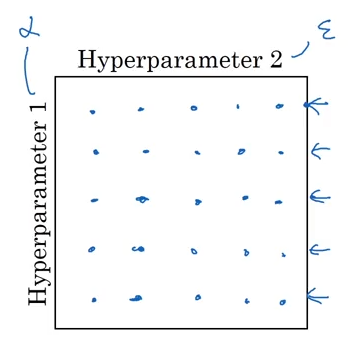

In [1]:
from IPython.display import Image

Image('images/feature_grid.PNG')

By grid searching over any feature space that includes `epsilon`, we're putting **five times the computation** on our system for less-than-negligible performance gain.

Instead, Andrew Ng suggests doing a random search over the feature space to arrive at your coefficients. If instead, we did half the number of searches in a random fashion (below), we'd still get the learnings from tuning `alpha`, without over-searching in the `epsilon` space.

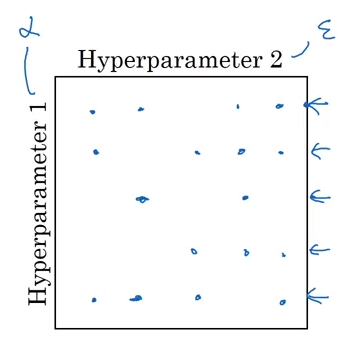

In [2]:
Image('images/feature_grid_random.png')

But this presents a new, interesting problem.

Whereas something like *Number of Layers* or *Number of Hidden* units might make sense to sample from on a linear scale, not all coefficients behave this way.

For instance, adjusting our `alpha` constant between `0.05` and `0.06` likely has a bigger performance impact than adjusting between `0.5` and `0.6`, as it's often a low-valued number.

And so by sampling randomly on a linear scale between `0.0001` and and `1`, we spend as much compute resources investigating the upper-range values as the incremental, lower ones where the real optimization occurs.

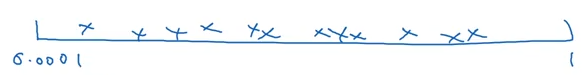

In [3]:
Image('images/uniform_alpha.PNG')

## Scaling

Thus, determining the correct scaling mechanism for your hyperparameters is crucial. You want to scale, based on the class of the coefficient, which may include the following:

### Linear

This one's easy. We just want to do a uniform search between two values.

In [4]:
import numpy as np

min_val, max_val = 0, 1

np.random.uniform(min_val, max_val)

0.9358677626967968

### Discrete

For whole-numbered values between two values, we'll use `randint()`

In [5]:
np.random.randint(0, 10)

2

### Log Scale

For coefficients, like `alpha` above, where we want to select between a very small value and `1`, it's helpful to consider how to write it out as an exponent. For instance:

$0.0001 = 10^{-4}$

similarly


$1 = 10^{0}$

So this is actually just the same exercise as the Linear Scale, but between some negative number and `0`, then piped as an exponent!

In [8]:
min_exp, max_exp = -4, 0

val = np.random.uniform(min_exp, max_exp)
10 ** val

0.00305918793992655

### Exponentially Weighted

This would likely be better-named as "Reverse Log Scale," describing hyperparameters where your search space is most effective between, say, `0.9` and `0.999`, on a Log-ish scale.

Following the same approach as above, we just want to do a uniform search over the correct range of values, plus some other steps-- in this case, establishing a log log scale for `0.9` to `0.999` involves establishing a log scale for `0.0001` to `0.1` and subtracting that from `1`

In [7]:
min_exp, max_exp = -3, -1

val = np.random.uniform(min_exp, max_exp)
1 - (10 ** val)

0.9908195535776579